### Урок 3. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('../non_linear.csv')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [36]:
def generate_degrees(source_data: list, degree: int):
    '''Функция которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до degree возводим x в эту степень'''
    return np.array([
        source_data ** n for n in range(1, degree + 1)
    ]).T

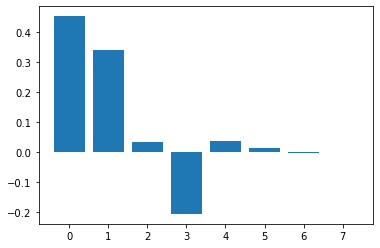

In [39]:
y = data.y_train.values

for i in range(1, 9):
    degree = i
    X = generate_degrees(data.x_train, degree)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    
    model_Ridge = Ridge(alpha=0.8).fit(X_train, y_train)
    
    y_pred_Ridge = model_Ridge.predict(X_valid)
    y_pred_Ridge_train = model_Ridge.predict(X_train)
    
    RMSE_Ridge = mean_squared_error(y_valid, y_pred_Ridge)
    RMSE_Ridge_train = mean_squared_error(y_train, y_pred_Ridge_train)
    
plt.figure()
plt.bar(range(degree), model_Ridge.coef_)    
plt.show()

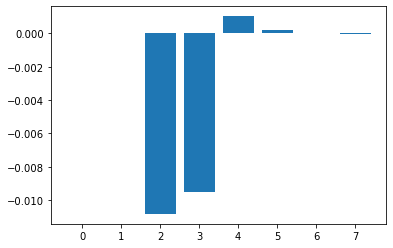

In [40]:
y = data.y_train.values

for i in range(1, 9):
    degree = i
    X = generate_degrees(data.x_train, degree)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    
    model_Lasso = Lasso(alpha=0.8).fit(X_train, y_train)
    
    y_pred_Lasso = model_Lasso.predict(X_valid)
    y_pred_Lasso_train = model_Lasso.predict(X_train)
    
    RMSE_Lasso = mean_squared_error(y_valid, y_pred_Lasso)
    RMSE_Lasso_train = mean_squared_error(y_train, y_pred_Lasso_train)
            
plt.figure()
plt.bar(range(degree), model_Lasso.coef_)    
plt.show()

### Урок 8. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

In [44]:
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

s = StandardScaler()
X_train = s.fit_transform(np.array(X_train))
X_test = s.transform(np.array(X_test))

Итерации остановлены на шаге 37
r2_score: 0.63478


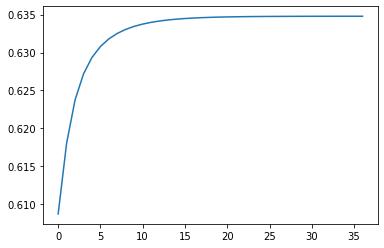

In [45]:
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=42)

w_current, epsilon = np.random.random(13), 0.0001

weigth_evolution, r2_evolution = [], []  # Изменение весов и ошибка на валидации

for step in range(800):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weigth_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    
    if weigth_evolution[-1] < epsilon:
        print('Итерации остановлены на шаге %d' % step); break
    
    r2_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test)))
    w_current = sgd_regressor.coef_.copy()
    
print('r2_score: %.5f' % r2_score(y_test, sgd_regressor.predict(X_test)))
plt.plot(range(step), r2_evolution)
plt.show()

### Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.spatial import distance

In [47]:
data = pd.read_csv('../non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


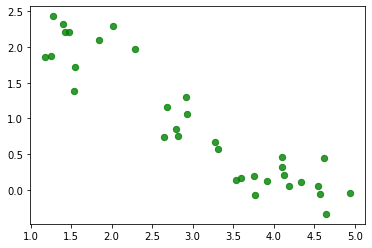

In [48]:
# Основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

In [55]:
alpha = 0.009
def gradient(X, y, w, alpha) -> np.array:
    '''Функция нахождения градиента'''
    # Количество обучающих примеров в выборке
    n = X.shape[0]
    
    # Считаем прогноз
    y_hat = X.dot(w.T)
    
    # Вычисляем ошибку прогноза
    error = y - y_hat
    
    # Градиент
    grad = (np.multiply(X, error) + alpha * 2 * w).sum(axis = 0) * (-1.0) * 2.0 / n
    
    return grad, error

def eval_w_next(X, y, eta, w_current):
    '''Функция для вычисления градиента с шагами'''
    # Вычислить градиент
    grad, error = gradient(X, y, w_current, alpha)
    
    # Шаг градиентного спуска
    w_next = w_current - eta * grad
    
    # Условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    
    return (w_next, weight_evolution, grad)

def gradien_descent(X, y, eta = 0.01, epsilon = 0.001):  # eta - шаг градиентного спуска
    m = X.shape[1]  # Число фичей - размерность градиента
    w = np.random.random(m).reshape(1, -1)  # w_current - нахождение точки в пространстве
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 == 0:
            print('step %s, |w - w_next| = %0.5f, grad = %s' % (step, weight_evolution, grad))
    
    return w

In [61]:
X = data.x_train.values.reshape(-1, 1)  # Создаем вектор столбец, т.е 1 столбец и -1, т.е строк столько, сколько есть
n = X.shape[0]  # Получение количество элементов выборки

# Добавляем тривиальный признак
X = np.hstack([
    np.ones(n).reshape(-1, 1),
    X
])

w = gradien_descent(X, data.y_train.values.reshape(-1, 1), eta=0.008)

step 100, |w - w_next| = 0.00518, grad = [-0.62156021  0.17955639]
step 200, |w - w_next| = 0.00438, grad = [-0.52647065  0.1520869 ]
step 300, |w - w_next| = 0.00371, grad = [-0.44592838  0.12881984]
step 400, |w - w_next| = 0.00315, grad = [-0.3777079  0.1091123]
step 500, |w - w_next| = 0.00266, grad = [-0.31992415  0.09241972]
step 600, |w - w_next| = 0.00226, grad = [-0.27098046  0.07828087]
step 700, |w - w_next| = 0.00191, grad = [-0.22952444  0.06630504]
step 800, |w - w_next| = 0.00162, grad = [-0.19441058  0.05616135]
step 900, |w - w_next| = 0.00137, grad = [-0.16466862  0.04756949]
step 1000, |w - w_next| = 0.00116, grad = [-0.13947674  0.04029206]


In [62]:
support = np.linspace(X.min(), X.max(), num=100)

# Делаем предикт - считаем предсказание модели в каждой точке обучающей выборки в виде y = X * w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)

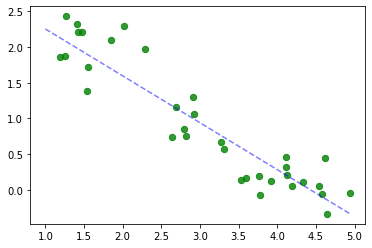

In [63]:
# Строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='date')
plt.show()

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.